In [1]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor
import numpy as np
import pandas as pd
import pickle


with open('movie_data_with_budgets.pkl', 'rb') as f:
    data = pickle.load(f)

actors_df = pd.read_csv("actors.csv")
directors_df = pd.read_csv("directors.csv")
writers_df = pd.read_csv("writers.csv")


In [36]:
# with open('movie_data_with_budgets.pkl', 'wb') as file: 
#     pickle.dump(data, file) 

In [56]:
# Imdb title data
# title_principals = pd.read_csv("title.principals.tsv", sep="\t", low_memory=False)
# tconst = data["tconst"].tolist()
# title_principals = title_principals[title_principals["tconst"].isin(tconst)]

In [57]:
# Add nconst list to data
# tmp_list = []

# for title in tconst:
#     tmp_list.append(title_principals.loc[title_principals["tconst"] == title, "nconst"].values)

# data["nconst"] = tmp_list

In [58]:
# Compute average production budgets for actors

# actors_df["avg_budget"] = np.zeros(len(actors_df), dtype="float")

# for name_id in actors_df["nconst"].values:
#     title_values = title_principals[title_principals["category"].isin(["actor", "actress"])].loc[title_principals["nconst"] == name_id, "tconst"].values
#     actors_df.loc[actors_df["nconst"] == name_id, "avg_budget"] = data.loc[data["tconst"].isin(title_values), "adjusted_prod_budget"].values.mean()

In [59]:
# Compute average production budgets for directors

# directors_df["avg_budget"] = np.zeros(len(directors_df), dtype="float")

# for name_id in directors_df["nconst"].values:
#     title_values = title_principals[title_principals["category"] == "director"].loc[title_principals["nconst"] == name_id, "tconst"].values
#     directors_df.loc[directors_df["nconst"] == name_id, "avg_budget"] = data.loc[data["tconst"].isin(title_values), "adjusted_prod_budget"].values.mean()

In [60]:
# Compute average production budgets for writers

# writers_df["avg_budget"] = np.zeros(len(writers_df), dtype="float")

# for name_id in writers_df["nconst"].values:
#     title_values = title_principals[title_principals["category"] == "writer"].loc[title_principals["nconst"] == name_id, "tconst"].values
#     writers_df.loc[writers_df["nconst"] == name_id, "avg_budget"] = data.loc[data["tconst"].isin(title_values), "adjusted_prod_budget"].values.mean()

In [61]:
# actors_df.to_csv("actors.csv")
# directors_df.to_csv("directors.csv")
# writers_df.to_csv("writers.csv")

In [38]:
# Create df of average profits, budgets and number of films for actors, directors and writers of each title

averages_df = pd.DataFrame(np.zeros((len(data), 9)))
averages_df.columns = ["actors_avg_profits", "actors_avg_budgets", "actors_avg_nof_films",\
                        "directors_avg_profits", "directors_avg_budgets", "directors_avg_nof_films",\
                        "writers_avg_profits", "writers_avg_budgets", "writers_avg_nof_films"]

nconst_list = data["nconst"].values
for row, name_ids in enumerate(nconst_list):

    averages_df.loc[row, "actors_avg_profits"] = actors_df.loc[actors_df["nconst"].isin(name_ids), "avg_profit"].mean()
    averages_df.loc[row, "actors_avg_budgets"] = actors_df.loc[actors_df["nconst"].isin(name_ids), "avg_budget"].mean()
    averages_df.loc[row, "actors_avg_nof_films"] = actors_df.loc[actors_df["nconst"].isin(name_ids), "nof_films"].mean()

    averages_df.loc[row, "directors_avg_profits"] = directors_df.loc[directors_df["nconst"].isin(name_ids), "avg_profit"].mean()
    averages_df.loc[row, "directors_avg_budgets"] = directors_df.loc[directors_df["nconst"].isin(name_ids), "avg_budget"].mean()
    averages_df.loc[row, "directors_avg_nof_films"] = directors_df.loc[directors_df["nconst"].isin(name_ids), "nof_films"].mean()

    averages_df.loc[row, "writers_avg_profits"] = writers_df.loc[writers_df["nconst"].isin(name_ids), "avg_profit"].mean()
    averages_df.loc[row, "writers_avg_budgets"] = writers_df.loc[writers_df["nconst"].isin(name_ids), "avg_budget"].mean()
    averages_df.loc[row, "writers_avg_nof_films"] = writers_df.loc[writers_df["nconst"].isin(name_ids), "nof_films"].mean()

In [39]:
# Create df of genres for each title

genres = np.unique(np.hstack(data["Genre"]))

genre_df = pd.DataFrame(np.zeros((len(data), len(genres))))
genre_df.columns = genres

genres = data["Genre"].values

for row in range(len(data)):
    for genre in genres[row]:
        genre_df.loc[row, genre] = 1


In [40]:
# Create df of release month

released = data["Released"].dt.month.values
month_columns = np.unique(released)

month_df = pd.DataFrame(np.zeros((len(data), len(month_columns))))
month_df.columns = month_columns

for row, month in enumerate(released):
    month_df.loc[row, month] = 1

month_df.columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "NaN"]

In [248]:
# Adjust budgets for inflation

# inf_adj_df = pd.read_csv("inflation_adjustments.csv", sep="|")
# inf_adj_df.columns = ["year", "adjustment"]

# inf_adj_df["adjustment"] = inf_adj_df["adjustment"].str.replace('%', '').astype(float)
# inf_adj_df["adjustment"] = (inf_adj_df["adjustment"]+100)/100


# adjusted_budget = np.zeros(len(data))
# years = data["Year"].values
# budgets = data["Production budget"].values

# for i in range(len(data)):
#     adjustment = inf_adj_df.loc[inf_adj_df["year"] > years[i], "adjustment"].product()
#     adjusted_budget[i] = budgets[i]*adjustment


# data["adjusted_prod_budget"] = adjusted_budget


In [35]:
# Adjust box office for inflation

# inf_adj_df = pd.read_csv("inflation_adjustments.csv", sep="|")
# inf_adj_df.columns = ["year", "adjustment"]

# inf_adj_df["adjustment"] = inf_adj_df["adjustment"].str.replace('%', '').astype(float)
# inf_adj_df["adjustment"] = (inf_adj_df["adjustment"]+100)/100

# adjusted_box = np.zeros(len(data))
# years = data["Year"].values
# box = data["BoxOffice"].values

# for i in range(len(data)):
#     adjustment = inf_adj_df.loc[inf_adj_df["year"] > years[i], "adjustment"].product()
#     adjusted_box[i] = box[i]*adjustment


# data["adjusted_box_office"] = adjusted_box

In [327]:
# round log profit so it won't go near infty
#data["log_profit"] = data["profit"].round(2).transform(lambda x: np.log10(x) if x > 0 else 0).round(2)

In [41]:
# X = data.copy().reset_index().drop(columns="index")
# X = pd.concat((X, averages_df, genre_df, month_df), axis=1)

# with open('X_data.pkl', 'wb') as file: 
#     pickle.dump(X, file) 

In [2]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor
import numpy as np
import pandas as pd
import pickle

with open('X_data.pkl', 'rb') as f:
    X = pickle.load(f)

X = X.drop(columns=["Title", "Year", "Rated", "Released", "Genre", "Director", "Writer", "Actors",\
                    "Plot", "Language", "Country", "Awards", "Metascore", "imdbRating", "imdbVotes",\
                    "tconst", "BoxOffice", "RottenTomatoes", "Production budget", "nconst",\
                    "adjusted_box_office", "log_profit"])

X = X.dropna()




In [97]:
y = X["profit"]
X = X.drop(columns="profit")
y = (y > 1) * 1
y = y.astype("category")

In [90]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

tpot = TPOTRegressor(generations=3, population_size=40, verbosity=2)
tpot.fit(X_train, y_train)

                                                                             
Generation 1 - Current best internal CV score: -0.1150781903398684
                                                                              
Generation 2 - Current best internal CV score: -0.11494828081855127
                                                                              
Generation 3 - Current best internal CV score: -0.11354836179961365
                                                                              
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=2, min_samples_split=14, n_estimators=100)


TPOTRegressor(generations=3, population_size=40, verbosity=2)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = tpot.predict(X_test)

print('MAE',mean_absolute_error(y_pred=y_pred, y_true=y_test))
print('MSE',mean_squared_error(y_pred=y_pred, y_true=y_test))
print('R2',r2_score(y_pred=y_pred, y_true=y_test))

In [98]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

tpot = TPOTClassifier(generations=3, population_size=40, verbosity=2)
tpot.fit(X_train, y_train)

                                                                             
Generation 1 - Current best internal CV score: 0.8386277001270649
                                                                              
Generation 2 - Current best internal CV score: 0.8386277001270649
                                                                              
Generation 3 - Current best internal CV score: 0.8398983481575604
                                                                              
Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.4, min_samples_leaf=1, min_samples_split=4, n_estimators=100)


TPOTClassifier(generations=3, population_size=40, verbosity=2)

In [99]:
from sklearn.metrics import accuracy_score
y_pred = tpot.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.8434959349593496


In [101]:
tpot.export('tpot_profit_classifier.py')

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()

# Function to work out optimal number of K for K-mean clustering
import matplotlib.pyplot as plt

def optimise_k_mean(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, "o-")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

In [72]:
# # Standardize number of films and average profit
# actors_df[["nof_films_T", "avg_profit_T", "log_avg_profit_T", "avg_budget_T"]] = scaler.fit_transform(actors_df[["nof_films", "avg_profit", "log_avg_profit", "avg_budget"]])
# directors_df[["nof_films_T", "avg_profit_T", "log_avg_profit_T", "avg_budget_T"]] = scaler.fit_transform(directors_df[["nof_films", "avg_profit", "log_avg_profit", "avg_budget"]])
# writers_df[["nof_films_T", "avg_profit_T", "log_avg_profit_T", "avg_budget_T"]] = scaler.fit_transform(writers_df[["nof_films", "avg_profit", "log_avg_profit", "avg_budget"]])

In [18]:
kmeans = KMeans(n_clusters=10)

kmeans.fit(actors_df[["nof_films_T", "avg_profit", "avg_budget_T"]])
actors_df["cluster"] = kmeans.labels_

kmeans.fit(directors_df[["nof_films_T", "avg_profit", "avg_budget_T"]])
directors_df["cluster"] = kmeans.labels_

kmeans.fit(writers_df[["nof_films_T", "avg_profit", "avg_budget_T"]])
writers_df["cluster"] = kmeans.labels_

In [74]:
# actors_df.to_csv("actors.csv")
# directors_df.to_csv("directors.csv")
# writers_df.to_csv("writers.csv")

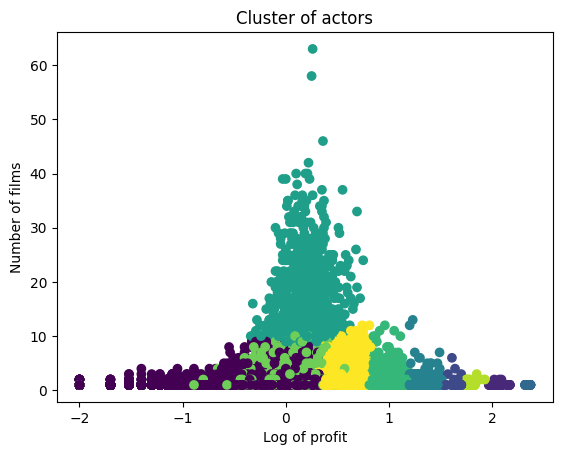

In [27]:
import matplotlib.pyplot as plt

plt.scatter(data=actors_df, x="log_avg_profit", y="nof_films", c="cluster")
plt.xlabel("Log of profit")
plt.ylabel("Number of films")
plt.title("Cluster of actors")
plt.show()

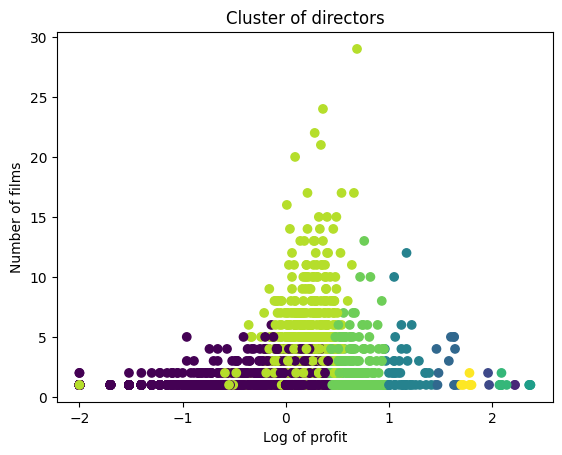

In [28]:
plt.scatter(data=directors_df, x="log_avg_profit", y="nof_films", c="cluster")
plt.xlabel("Log of profit")
plt.ylabel("Number of films")
plt.title("Cluster of directors")
plt.show()

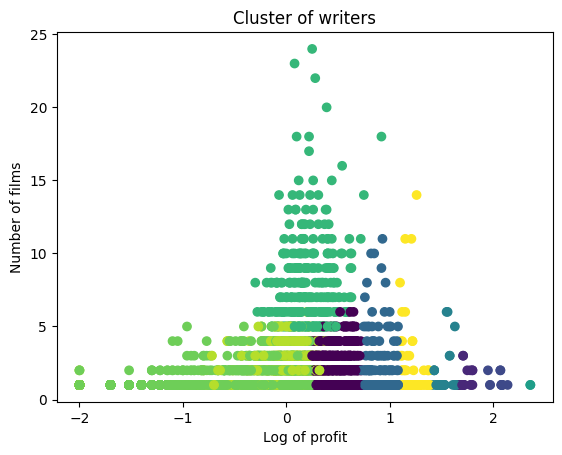

In [29]:
plt.scatter(data=writers_df, x="log_avg_profit", y="nof_films", c="cluster")
plt.xlabel("Log of profit")
plt.ylabel("Number of films")
plt.title("Cluster of writers")
plt.show()

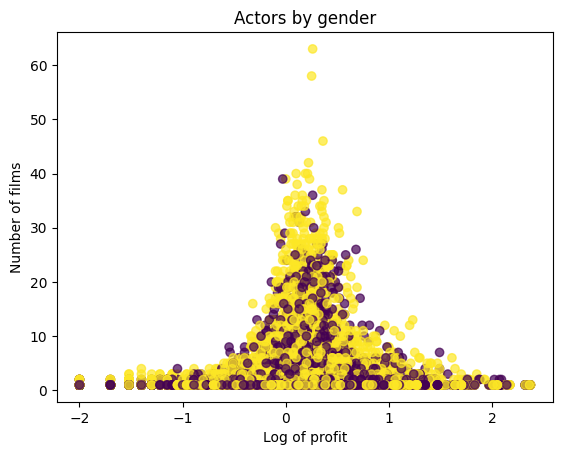

In [31]:
plt.scatter(data=actors_df, x="log_avg_profit", y="nof_films", alpha=0.7, c="gender")
plt.xlabel("Log of profit")
plt.ylabel("Number of films")
plt.title("Actors by gender")
plt.show()